In [1]:
import jittor as jt
from jittor.optim import Optimizer
from jittor import Module
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

[i 0319 15:51:37.066728 00 log.cc:351] Load log_sync: 1
[i 0319 15:51:37.120513 00 compiler.py:956] Jittor(1.3.8.5) src: /Users/mumujun/anaconda3/envs/jittor/lib/python3.12/site-packages/jittor
[i 0319 15:51:37.142321 00 compiler.py:957] clang at /usr/bin/clang++(15.0.0)
[i 0319 15:51:37.143308 00 compiler.py:958] cache_path: /Users/mumujun/.cache/jittor/jt1.3.8/clang15.0.0/py3.12.2/macOS-13.6.3-ax71/AppleM1Pro/default
[i 0319 15:51:37.479637 00 __init__.py:227] Total mem: 16.00GB, using 5 procs for compiling.
[i 0319 15:51:37.598753 00 jit_compiler.cc:28] Load cc_path: /usr/bin/clang++


In [2]:
def data_gen(w,b,num_examples): #@save
    X=jt.normal(0,1,(num_examples,len(w))) #y=Xw+b+noise size:1000xlen(w)
    y=jt.matmul(X,w)+b #size:1000x1
    y+=jt.normal(0,0.03,y.shape) #add noise
    return X,y.reshape((-1,1))

true_w=jt.array([4,-3.4,2.8]) #1xlen(w)
true_b=3
features,labels=data_gen(true_w,true_b,1000)
#feature: 1000xL
#labels: 1000x1

In [3]:
ft=features.numpy()
lb=labels.numpy()
ft=ft[:,1] 

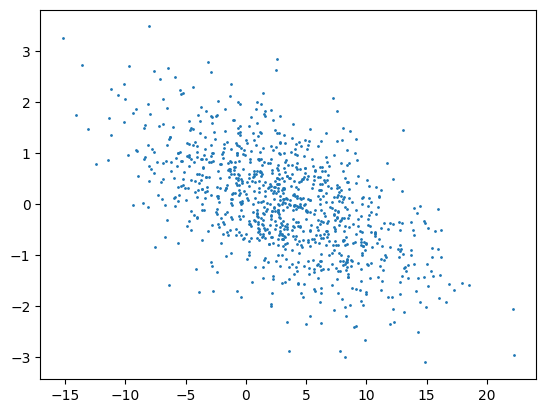

In [4]:
# print(jt.size(features,1))
# print('features: ',ft,'\nlabel: ',lb)
plt.scatter(lb,ft,1)

In [5]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples)) #[0,1,...,1000]
    random.shuffle(indices) #read the data randomly
    for i in range(0,num_examples,batch_size):
        batch_indices=jt.array(indices[i:min(i+batch_size,num_examples)]) #to choose an array and make a list
        #choose the matrix by indices.
        yield features[batch_indices],labels[batch_indices]

In [6]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

jt.Var([[-0.03893229 -2.9905696  -1.7120773 ]
        [ 1.2354306  -0.29420775  0.0998992 ]
        [ 1.071939    0.5043618  -1.0700399 ]
        [-1.0153074  -2.3171968   1.962494  ]
        [-0.7834949   1.8761837  -0.01141519]
        [ 0.30203664 -0.80141973  0.27243063]
        [ 1.6602508  -1.3155715  -0.28602996]
        [-0.38050282  0.8764973   1.2686408 ]
        [ 0.7770671  -0.36909714  2.6794353 ]
        [ 0.5022873   0.08119417 -1.6156458 ]], dtype=float32) 
 jt.Var([[ 8.205757  ]
        [ 9.269379  ]
        [ 2.5462036 ]
        [12.286426  ]
        [-6.5205536 ]
        [ 7.677786  ]
        [13.311278  ]
        [ 2.0837538 ]
        [14.835167  ]
        [ 0.16435415]], dtype=float32)


In [7]:
class MyModel(Module):
    def __init__(self,l):
        super().__init__()
        self.w=jt.rand(1,l)
        self.b=jt.rand(1)
    def execute(self,x):
        y_hat=self.b+jt.matmul(x,jt.transpose(self.w))
        return y_hat

In [8]:
model=MyModel(len(true_w))
loss_function=jt.nn.MSELoss()
lr=0.1
optimizer=jt.nn.SGD(model.parameters(),lr)

In [9]:
def train(model,x_train,y_train,loss,opt):
    model.train()
    y_hat=model(x_train)
    l=loss(y_train,y_hat)
    optimizer.step(l)
    return l


In [10]:
def val(model, x_val, y_val, loss_function):
    model.eval()                                 
    y_pred = model(x_val)                        
    loss = loss_function(y_val, y_pred)               
    return loss                                  

Before training: 
 {'w': jt.Var([[0.991722   0.41337296 0.926833  ]], dtype=float32), 'b': jt.Var([0.15439433], dtype=float32)}


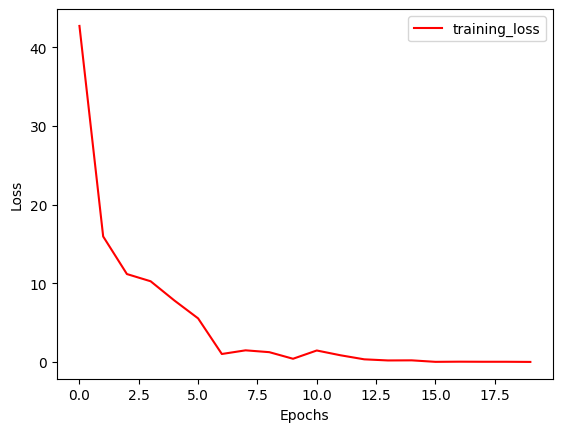

After training: 
 {'w': jt.Var([[ 4.001703  -3.4033418  2.8037632]], dtype=float32), 'b': jt.Var([3.0002983], dtype=float32)}
True w: jt.Var([ 4.  -3.4  2.8], dtype=float32) True b: 3


In [11]:
# 打印训练前的模型参数
print("Before training: \n", model.state_dict())

# 设置迭代次数（在这个案例中，一个纪元（Epoch）即是一个迭代（Iteration））
epochs = 500

# 初始化空列表，分别用于记录训练集和验证集上的 Loss 值
train_loss_list = []
batch_size=10 #1000/10=100
# 循环迭代训练
for epoch in range(epochs):
    # 在训练集上进行训练，将更新模型参数。
    for x_train,y_train in data_iter(batch_size,features,labels):
        train_loss = train(model, x_train, y_train, loss_function, optimizer)
        train_loss_list.append(train_loss)
    
plt.plot(train_loss_list[:20],'r',label="training_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 打印训练结束后的模型参数
print("After training: \n", model.state_dict())
print("True w:",true_w,"True b:",true_b)